In [4]:
from api_wrappers.kraken_wrapper import KrakenWrapper

wrapper = KrakenWrapper(lb_interval="1day")

all_assets = wrapper.get_assets("USD")
print(len(all_assets))
for asset in all_assets:
    print(asset + "\n")

474
1INCHUSD

AAVEUSD

ABUSD

ACAUSD

ACHUSD

ACTUSD

ACXUSD

ADAUSD

ADXUSD

AEROUSD

AEVOUSD

AGLDUSD

AI16ZUSD

AIOZUSD

AIRUSD

AIXBTUSD

AKTUSD

ALCHUSD

ALCXUSD

ALGOUSD

ALICEUSD

ALPHAUSD

ALTUSD

ANKRUSD

ANLOGUSD

ANONUSD

APENFTUSD

APEUSD

API3USD

APTUSD

APUUSD

ARBUSD

ARCUSD

ARKMUSD

ARPAUSD

ARUSD

ASRRUSD

ASTRUSD

ATHUSD

ATLASUSD

ATOMUSD

AUCTIONUSD

AUDIOUSD

AUDUSD

AURAUSD

AUSD

AVAAIUSD

AVAXUSD

AXSUSD

B3USD

BABYUSD

BADGERUSD

BALUSD

BANANAS31USD

BANDUSD

BATUSD

BCHUSD

BDXNUSD

BEAMUSD

BERAUSD

BICOUSD

BIGTIMEUSD

BIOUSD

BITUSD

BLURUSD

BLZUSD

BMTUSD

BNBUSD

BNCUSD

BNTUSD

BOBAUSD

BODENUSD

BONDUSD

BONKUSD

BRICKUSD

BSXUSD

BTTUSD

C98USD

CAKEUSD

CATUSD

CCDUSD

CELOUSD

CELRUSD

CFGUSD

CHEEMSUSD

CHEXUSD

CHILLHOUSEUSD

CHRUSD

CHZUSD

CLANKERUSD

CLOUDUSD

CLVUSD

CMETHUSD

COMPUSD

COOKIEUSD

COQUSD

CORNUSD

COTIUSD

COWUSD

CPOOLUSD

CQTUSD

CROUSD

CRVUSD

CSMUSD

CTSIUSD

CVCUSD

CVXUSD

CXTUSD

CYBERUSD

DAIUSD

DASHUSD

DBRUSD

D

In [ ]:
hist_dict = wrapper.pull_kraken_hist_usd_simple()

KeyboardInterrupt: 

In [147]:
test_key = list(hist_dict.keys())[14]
test_result = hist_dict[test_key]

print(test_key)
for row in test_result:
    print(row[-2])

AIXBTUSD
61096.65345
121422.37757
40415.76358
181587.23139
100105.07685
4112476.69735
243681.97105
437995.58110
192668.05604
473357.91282
678695.19772
442592.95359
360436.32641
297673.35485
434197.20654
257842.78625
221608.87707
371612.92715
221198.95236
176012.93401
254569.78084
352639.16753
87044.45342
345821.25355
407738.98160
444765.85849
326322.91502
316884.89175
150179.01589
185812.99908
63526.79730
1079353.15701
707247.42822
392039.15179
706392.18176
1094333.63927
160464.82865
91169.82535
48899.35652
531506.63187
681525.69380
960696.70631
648253.61847
803927.93418
862572.77251
791971.73640
536548.71695
617013.98936
550366.72051
1302509.53895
377771.84545
1290887.69122
1109587.03166
615493.74630
1807534.10004
114215.95782
178672.16957
208195.02852
43983.51865
43126.17076
2069706.68165
2369728.79398
330138.69764
1358201.08806
4072754.86400
1782840.54976
2727509.60015
1202460.49163
1421348.93721
2949223.82425
2118602.57960
365862.58258
442175.70832
1080085.55000
522073.99843
303292

In [148]:
import pandas as pd
bar_data_names = ["date","open","high","low","close","vwap","volume","drop"]
df = pd.DataFrame(test_result, columns=bar_data_names)
print(df.head())

         date    open    high     low   close    vwap        volume  drop
0  1740096000  0.2500  0.2500  0.1952  0.1970  0.2024   61096.65345    92
1  1740182400  0.2109  0.2300  0.1961  0.2170  0.2109  121422.37757   187
2  1740268800  0.2158  0.2192  0.1977  0.2064  0.2085   40415.76358    95
3  1740355200  0.2139  0.2244  0.1730  0.1751  0.1853  181587.23139   186
4  1740441600  0.1750  0.2151  0.1589  0.1941  0.1846  100105.07685   167


Mean: -0.0011495492194632958


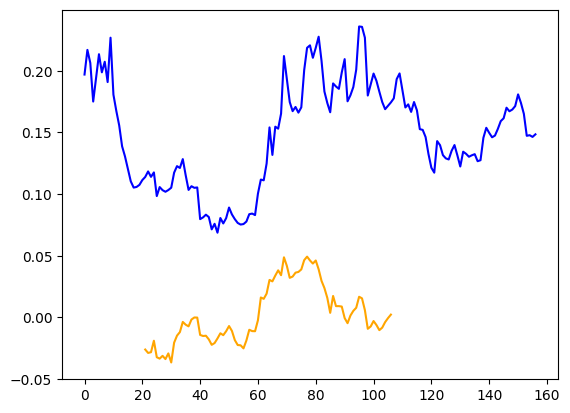

In [162]:
import numpy as np
import matplotlib.pyplot as plt
df['close'] = pd.to_numeric(df['close'], errors='coerce')
log_returns = np.log(df['close'][:-50]).diff().dropna()

plt.plot(log_returns.rolling(21).mean(), label='Rolling Mean (21 days)', color='orange')
plt.plot(df['close'], label='Close Price', color='blue')
print("Mean:", log_returns.mean())

In [150]:
sigma = log_returns.std()

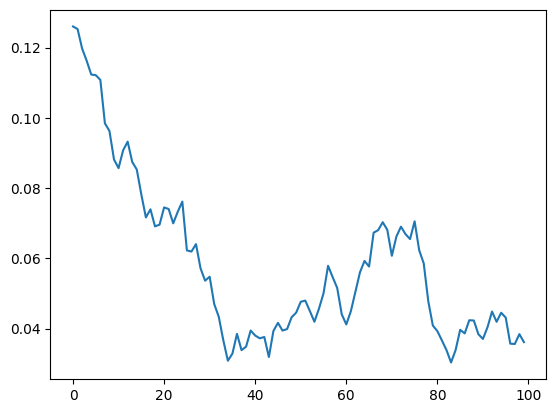

In [151]:
from utils.synthetic_data_service import SyntheticOHLCVGenerator


dg = SyntheticOHLCVGenerator(
    mu=log_returns.mean(),
    sigma=sigma,
    dt=1,  # If your data is daily, dt=1
    n_steps=100,  # Number of data points to generate
    seed=89,  # For reproducibility
    #start_price=df['close'].iloc[-1]  # Start from the last close price
)

test_data = dg.generate(start=df['close'].iloc[-1])
df_test = pd.DataFrame(test_data, columns=bar_data_names)

plt.plot(df_test['close'])



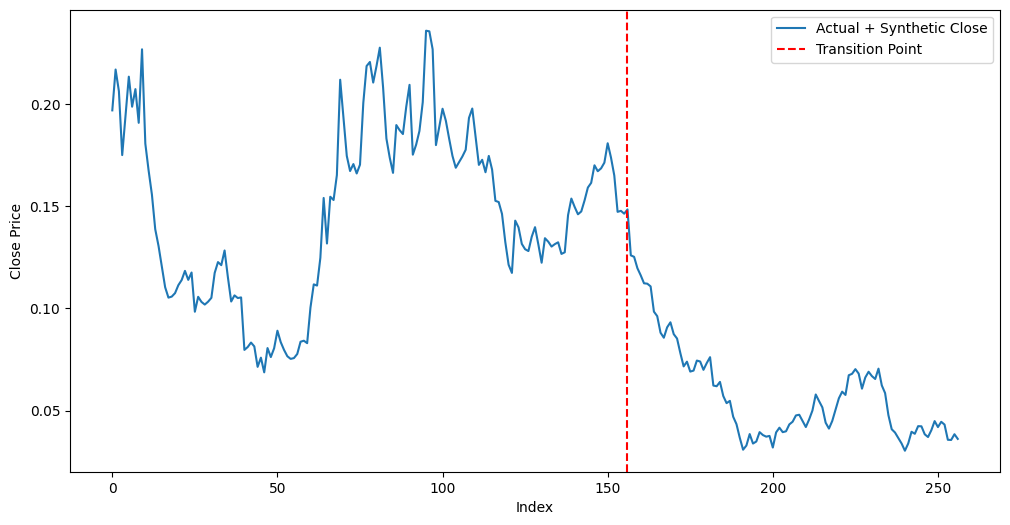

In [152]:
# Ensure both DataFrames have the same columns and index order
df = df.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

# Concatenate real and synthetic data
combined_df = pd.concat([df, df_test], ignore_index=True)

# Plot the combined close prices
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(combined_df['close'], label='Actual + Synthetic Close')
plt.axvline(len(df)-1, color='red', linestyle='--', label='Transition Point')
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.legend()
plt.show()

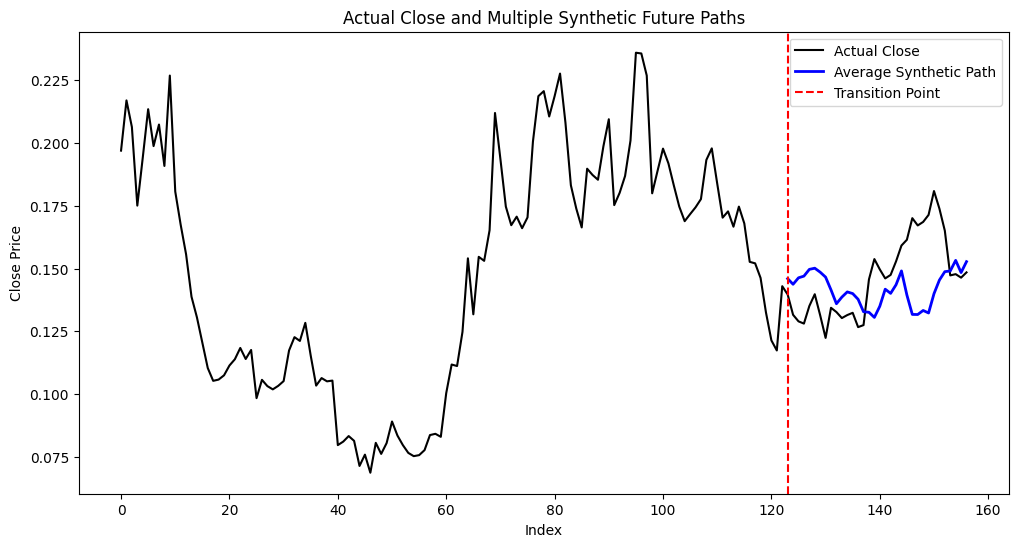

In [156]:
# Number of synthetic paths to generate
#seeds = [21, 42, 63, 84, 105, 126, 147, 168, 189, 210]  # Different seeds for variety
seeds = range(100, 100 + 8)
num_paths = len(seeds)
gen_start = 34  # Start generating synthetic paths from the last 100 points of actual data
synthetic_paths = []

for seed in seeds:
    dg = SyntheticOHLCVGenerator(
        mu=log_returns.mean(),
        sigma=sigma,
        dt=1,
        n_steps=gen_start,
        seed=seed
    )
    test_data = dg.generate(start=df['close'].iloc[-gen_start])
    synthetic_paths.append(test_data['close'].values)

# Plot actual data
plt.figure(figsize=(12, 6))
plt.plot(df['close'], color='black', label='Actual Close')

# Plot all synthetic paths

'''for i, path in enumerate(synthetic_paths):
    plt.plot(range(len(df)-gen_start, len(df) + len(path)-gen_start), path, alpha=0.6, label=f'Path {i+1}' if i == 0 else None)'''

# Convert list of arrays to a 2D NumPy array
paths_array = np.array(synthetic_paths)  # shape: (num_paths, n_steps)

# Calculate the average path
avg_path = paths_array.mean(axis=0)
# Plot the average synthetic path
plt.plot(range(len(df)-gen_start, len(df) + len(avg_path) - gen_start), avg_path, color='blue', linewidth=2, label='Average Synthetic Path')


plt.axvline(len(df)-gen_start, color='red', linestyle='--', label='Transition Point')
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.legend()
plt.title('Actual Close and Multiple Synthetic Future Paths')
plt.show()